In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import interpolate
import seaborn as sns

In [9]:
r300k = {'width': [1.4, 1.3, 1, 0.75, 0.5, 0.35, 1, 1, 1], 
     'res': [224, 224, 224, 224, 224, 224, 192, 160, 128], 
     'IOU=0.5': [0.140, 0.143, 0.127, 0.123, 0.091, 0.071, 0.112, 0.091, 0.059], 
     'IOU=0.75': [0.075, 0.077, 0.068, 0.061, 0.046, 0.033, 0.057, 0.040, 0.026], 
     'IOU=0.5:0.95': [0.076, 0.078, 0.071,0.066, 0.050, 0.037, 0.060, 0.047, 0.030], 
     'speed': [0.095,0.085, 0.064,0.059, 0.044, 0.040, 0.060, 0.051, 0.049],
     'FLOPs': [8457, 8457, 8457, 8457, 8457, 8457, 6233, 4637, 2937],
     'Params': [7830962, 6987077, 4707674, 3130714, 1815098, 1154634, 4707674, 4707674, 4707674]
    }
r800k = {'width': [1.4, 1.3, 1, 0.75, 0.5, 0.35, 1, 1, 1], 
         'res': [224, 224, 224, 224, 224, 224, 300, 192, 160], 
         'accuracy': [0.2 , 0.203, 0.173, 0.153, 0.125, 0.106, 0.193, 0.147, 0.123],
         'speed': [66.7, 58.9, 53.7, 51.8, 39.6, 37.5, 72.8, 51.3, 40.6],
         'in_speed': [138.0, 123.0, 73.8, 55.8, 28.7, 19.7, 0.0, 55.1, 40.2],
         'FLOPs': [8457, 8457, 8457, 8457, 8457, 8457, 15725, 6233, 4637],
         'Params': [7830962, 6987077, 4707674, 3130714, 1815098, 1733874, 4707674, 4707674, 4707674]
        }
#df = pd.DataFrame(data=r300k)
df = pd.DataFrame(data=r800k)
df

,width,res,accuracy,speed,in_speed,FLOPs,Params
0,1.40,224,0.200,66.7,138.0,8457,7830962
1,1.30,224,0.203,58.9,123.0,8457,6987077
2,1.00,224,0.173,53.7,73.8,8457,4707674
3,0.75,224,0.153,51.8,55.8,8457,3130714
4,0.50,224,0.125,39.6,28.7,8457,1815098
5,0.35,224,0.106,37.5,19.7,8457,1733874
6,1.00,300,0.193,72.8,0.0,15725,4707674
7,1.00,192,0.147,51.3,55.1,6233,4707674
8,1.00,160,0.123,40.6,40.2,4637,4707674


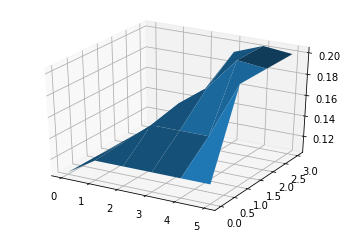

In [3]:
# visualize heatmap, col - 0.35 to 1.4, rol - 160 to 300
hm = np.zeros((4, 6))
hm[hm==0] = np.nan 
hm[2] = [0.106, 0.125, 0.153, 0.173, 0.203, 0.2]
hm[:,3] = [0.123, 0.147, 0.173, 0.193]

hm_speed = np.zeros((4, 6))
hm_speed[hm_speed==0] = np.nan 
hm_speed[2] = [37.5, 39.6, 51.8, 53.7, 58.9, 66.7] 
hm_speed[:,3] = [40.6, 51.3, 53.7, 72.8]

def fill_values(arr, method="nearest"):
    x = np.arange(0, arr.shape[1])
    y = np.arange(0, arr.shape[0])
    #mask invalid values
    arr = np.ma.masked_invalid(arr)
    xx, yy = np.meshgrid(x, y)
    #get only the valid values
    x1 = xx[~arr.mask]
    y1 = yy[~arr.mask]
    newarr = arr[~arr.mask]
    inter_arr = interpolate.griddata((x1, y1), newarr.ravel(),(xx, yy),method=method)
    return inter_arr
hm2 = fill_values(hm, method="cubic")
hm3 = fill_values(hm, method="nearest")
hm_speed2 = fill_values(hm_speed, method="cubic")
hm_speed3 = fill_values(hm_speed2, method="nearest")
hm_speed3[3,4:] = hm_speed3[3,3]

#fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 3))
#g1 = sns.heatmap(hm3, cmap="RdBu_r", ax=axes[0])
#g2 = sns.heatmap(hm_speed3, cmap="RdBu_r", ax=axes[1])
#axes[0].set_xticklabels([0.35, 0.5, 0.75, 1.0, 1.3, 1.4])
#axes[0].set_yticklabels([160, 192, 224, 300])
#axes[0].set_title("mAP")
#axes[0].set_xlabel("Width multiplier")
#axes[0].set_ylabel("Input resolution")
#axes[1].set_yticklabels([160, 192, 224, 300], visible=True)
#axes[1].set_xticklabels([0.35, 0.5, 0.75, 1.0, 1.3, 1.4])
#axes[1].set_title("Speed (ms)")
#axes[1].set_xlabel("Width multiplier")
#axes[1].set_ylabel("Input resolution")
#plt.setp(axes[1].get_yticklabels(), visible=True)
#plt.show()
#ax = sns.heatmap(hm, cmap=cmap)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X = np.arange(0, hm3.shape[1])
Y = np.arange(0, hm3.shape[0])
X, Y = np.meshgrid(X, Y)
fig = plt.figure(8)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, hm3)
plt.show()

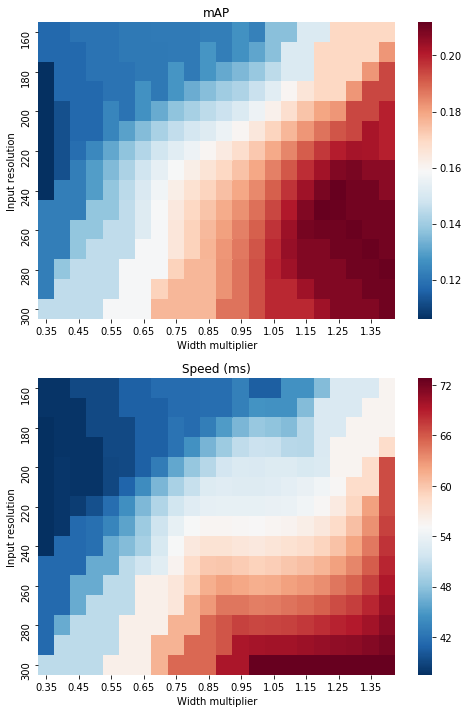

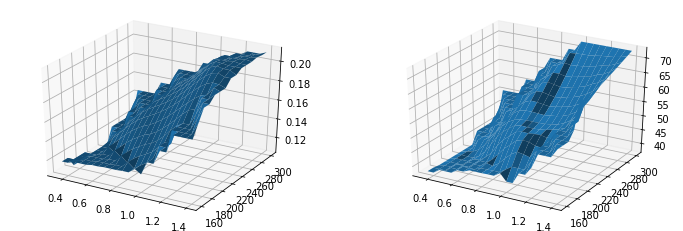

In [4]:
x = np.arange(0.35, 1.45, 0.05)
y = np.arange(160, 301, 10)
hm_acc = np.zeros((15,22))
hm_acc[hm_acc==0] = np.nan
hm_acc[0,13] = 0.123 # 160, 1.0
hm_acc[3,13] = 0.147 # 192, 1.0
hm_acc[6,13] = 0.173 # 224, 1.0
hm_acc[14,13] = 0.193 # 300, 1.0
hm_acc[6,0] = 0.106 # 224, 0.35
hm_acc[6,3] = 0.125 # 224, 0.5
hm_acc[6,8] = 0.153 # 224, 0.75
hm_acc[6,19] = 0.203 # 224, 1.3
hm_acc[6,21] = 0.2 # 224, 1.4

hm_speed = np.zeros((15, 22))
hm_speed[hm_speed==0] = np.nan 
hm_speed[0,13] = 40.6 # 160, 1.0
hm_speed[3,13] = 51.3 # 192, 1.0
hm_speed[6,13] = 53.7 # 224, 1.0
hm_speed[14,13:] = 72.8 # 300, 1.0
hm_speed[6,0] = 37.5 # 224, 0.35
hm_speed[6,3] = 39.6 # 224, 0.5
hm_speed[6,8] = 51.8 # 224, 0.75
hm_speed[6,19] = 58.9 # 224, 1.3
hm_speed[6,21] = 66.7 # 224, 1.4

hm_interAcc = fill_values(hm_acc, method="cubic")
hm_interAcc = fill_values(hm_interAcc, method="nearest")

hm_interSp = fill_values(hm_speed, method="cubic")
hm_interSp = fill_values(hm_interSp, method="nearest")

fig, axes = plt.subplots(nrows=2, figsize=(8, 12))
g1 = sns.heatmap(hm_interAcc, cmap="RdBu_r", ax=axes[0])
g2 = sns.heatmap(hm_interSp, cmap="RdBu_r", ax=axes[1])
nth = []
for i in range(0, len(x)):
    if i % 2 == 0:
        nth.append(x[i])
axes[0].set_xticklabels(np.around(nth, decimals=2))
axes[1].set_xticklabels(np.around(nth, decimals=2))
nth = []
for i in range(0, len(y)):
    if i % 2 == 0:
        nth.append(y[i])
axes[0].set_yticklabels(np.around(nth, decimals=2))
axes[1].set_yticklabels(np.around(nth, decimals=2))
axes[0].set_title("mAP")
axes[0].set_xlabel("Width multiplier")
axes[0].set_ylabel("Input resolution")
axes[1].set_title("Speed (ms)")
axes[1].set_ylabel("Input resolution")
axes[1].set_xlabel("Width multiplier")
axes[0].locator_params(axis='y', nbins=8)
axes[1].locator_params(axis='y', nbins=8)
axes[0].locator_params(axis='x', nbins=11)
axes[1].locator_params(axis='x', nbins=11)
plt.show()

fig = plt.figure(figsize=(12, 4))
X, Y = np.meshgrid(x, y)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, hm_interAcc)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, hm_interSp)
plt.show()

In [5]:
# objective function 
def obj_func(acc, speed, params):
    alpha = 1
    beta = 0.2
    gamma = 0.45
    frac = np.power(acc,alpha)/(np.power(params,beta)*np.power(speed,gamma))
    return 20*np.log(frac)

In [10]:
score = []
for i in range(0,9):
    score.append(obj_func(df.iloc[i]['accuracy']*100, df.iloc[i]['speed']/1000, df.iloc[i]['Params']/100000))
print(score)

[66.83991658065759, 68.71305584399533, 67.92609438266317, 67.42495798922685, 67.98001011768616, 65.35603591900296, 67.37533968761491, 65.08041447232517, 63.62075401432013]


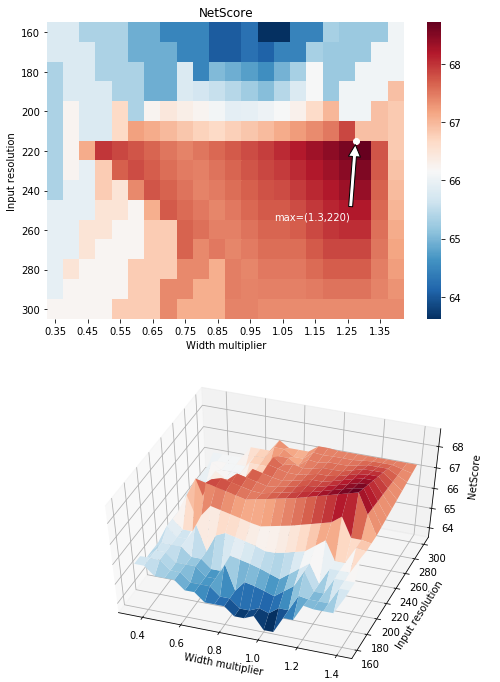

In [7]:
hm_score = np.zeros((15, 22))
hm_score[hm_score==0] = np.nan 
hm_score[0,13] = 63.62 # 160, 1.0
hm_score[3,13] = 65.08 # 192, 1.0
hm_score[6,13] = 67.93 # 224, 1.0
hm_score[14,13:] = 67.37 # 300, 1.0
hm_score[6,0] = 65.36 # 224, 0.35
hm_score[6,3] = 67.98 # 224, 0.5
hm_score[6,8] = 67.42 # 224, 0.75
hm_score[6,19] = 68.71 # 224, 1.3
hm_score[6,21] = 66.84 # 224, 1.4

hm_interScore = fill_values(hm_score, method="linear")
hm_interScore = fill_values(hm_interScore, method="nearest")
ymax, xmax = np.unravel_index(hm_interScore.argmax(), hm_interScore.shape) 
#fig, axes = plt.subplots(ncols=2, figsize=(12, 3))
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(2, 1, 1)
ax = sns.heatmap(hm_interScore, cmap="RdBu_r", ax=ax)
#axes[0] = sns.heatmap(hm_interScore, cmap="RdBu_r", ax=axes[0])
nth = []
for i in range(0, len(x)):
    if i % 2 == 0:
        nth.append(x[i])
#axes[0].set_xticklabels(np.around(nth, decimals=2))
ax.set_xticklabels(np.around(nth, decimals=2))
nth = []
for i in range(0, len(y)):
    if i % 2 == 0:
        nth.append(y[i])
ax.set_yticklabels(np.round(nth, decimals=2), rotation=0)
ax.set_xlabel("Width multiplier")
ax.set_ylabel("Input resolution")
ax.set_title("NetScore")
ax.plot(xmax, ymax, 'wo')
ax.annotate('max=(%s,%s)'%(np.around(x[xmax],decimals=2),y[ymax]), xy=(xmax,ymax), xytext=(xmax-5, ymax+4),color="white",
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
ax.locator_params(axis='y', nbins=8)
ax.locator_params(axis='x', nbins=11)

#fig = plt.figure(figsize=(10,5))
X, Y = np.meshgrid(x, y)
#axes[1] = fig.gca(projection='3d')
ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.plot_surface(X, Y, hm_interScore,cmap="RdBu_r")
ax.set_xlabel("Width multiplier")
ax.set_ylabel("Input resolution")
ax.set_zlabel("NetScore")
ax.view_init(50, 290)
plt.show()

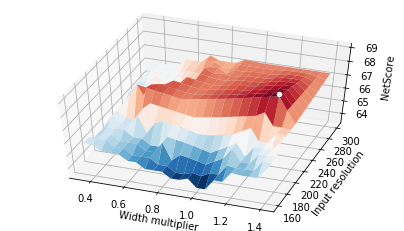

In [59]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, hm_interScore,cmap="RdBu_r")
ax.set_xlabel("Width multiplier")
ax.set_ylabel("Input resolution")
ax.set_zlabel("NetScore")
ax.scatter(1.3,220,68.9,c='w', marker='o')
ax.view_init(50, 290)
plt.show()

In [ ]:
row, col = np.unravel_index(hm_interScore.argmax(), hm_interScore.shape)
print("row:%s, col:%s"%(row,col))
print(hm_interScore[row,col])
print(hm_interScore[6,19])

In [ ]:
res = []
for i in range(0,9):
    if i not in (4, 5, 8):
        res.append(obj_func(df.iloc[i]['accuracy']*100, df.iloc[i]['speed']/1000, df.iloc[i]['Params']/100000))
print(res)

x = np.arange(6)
# plot bar graph
fig, ax = plt.subplots(figsize=(10, 4))
rects = plt.bar(x, res)
plt.xticks(x, ('(1.4,224)', '(1.3,224)', '(1.0,224)', '(0.75,224)', '(1.0, 300)', '(1.0,192)'))
plt.ylabel('Score')
plt.xlabel('Models')
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, '%.2f'%(height), ha='center', va='bottom') 
plt.show()

In [ ]:
# plot bar graph comparison of speeds
speed_det = (66.7, 58.9, 53.7, 51.8, 39.6, 37.5, 51.3, 40.6)
speed_clas = (138.0, 123.0, 73.8, 55.8, 28.7, 19.7, 55.1, 40.2)
n_groups = 8
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, speed_clas, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Mobilenetv2')
 
rects2 = plt.bar(index + bar_width, speed_det, bar_width,
                 alpha=opacity,
                 color='g',
                 label='SSD-Mobilenetv2')

plt.xlabel('Models (depth, resolution)')
plt.ylabel('CPU speed (ms)')
plt.xticks(index + bar_width/2, ('(1.4,224)', '(1.3,224)', '(1.0,224)', '(0.75,224)', '(0.5,224)', '(0.35,224)', '(1.0, 192)', '(1.0, 160)'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [ ]:
df.loc[df['res']==224]['accuracy'].tolist()

In [ ]:
df.loc[df['res']==224]['width'].tolist()

In [ ]:
# varying width, constant resolution with different IoUs
acc = df.loc[df['res']==224]['accuracy'].tolist()
width = df.loc[df['res']==224]['width'].tolist()
za = np.polyfit(width, acc, 3)
pa = np.poly1d(za)
xp = np.linspace(0.3, 1.5, 100)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

ap_width = df.loc[df['res']==224]
ax = ap_width.plot(ax=axes[0, 0], x='width', y='accuracy', style='bo', ylim=(0.08,0.21), legend=False, title='A')
ax.plot(xp, pa(xp), 'k--')
ax.set_xlabel('Width Multiplier')
ax.set_ylabel('Overall mAP')
ax.plot()

speed = df.loc[df['res']==224]['speed'].tolist()
zs = np.polyfit(width, speed, 2)
ps = np.poly1d(zs)

speed_width = df.loc[df['res']==224]
ax = speed_width.plot(ax=axes[1, 0], x='width', y='speed', style='bo', ylim=(30, 74), legend=False, title='C')
ax.plot(xp, ps(xp), 'k--')
ax.set_xlabel('Width Multiplier')
ax.set_ylabel('Average CPU Time (ms)')
ax.plot()

# varying resolution, constant width with different IoUs
acc = df.loc[df['width']==1]['accuracy'].tolist()
res = df.loc[df['width']==1]['res'].tolist()
za = np.polyfit(res, acc, 2)
pa = np.poly1d(za)
xp = np.linspace(150, 310, 100)

ap_res = df.loc[df['width']==1]
ax = ap_res.plot(ax=axes[0, 1], x='res', y='accuracy', style='bo', legend=False, title='B')
ax.plot(xp, pa(xp), 'k--')
ax.set_xlabel('Input Resolution')
ax.set_ylabel('Overall mAP')
ax.plot()

speed = df.loc[df['width']==1]['speed'].tolist()
zs = np.polyfit(res, speed, 2)
ps = np.poly1d(zs)

speed_res = df.loc[df['width']==1]
ax = speed_res.plot(ax=axes[1, 1], x='res', y='speed', style='bo', ylim=(30,74), legend=False, title='D')
ax.plot(xp, ps(xp),'k--')
ax.set_xlabel('Input Resolution')
ax.set_ylabel('Average CPU Time (ms)')
ax.plot()

In [ ]:
# speed vs accuracy
accuracy = df['accuracy'].tolist()
speed = df['speed'].tolist()
zs = np.polyfit(speed, accuracy, 2)
ps = np.poly1d(zs)
xp = np.linspace(35, 75, 100)

'''ax = df.loc[(df['width']==1.4) & (df['res']==224)].plot(x='speed', y='accuracy', color='#f44336', marker='o', label='(1.4,224)')
df.loc[(df['width']==1.3) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#e91e63', marker='o', label='(1.3,224)')
df.loc[(df['width']==1) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#9c27b0', marker='o', label='(1,224)')
df.loc[(df['width']==0.75) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#3f51b5', marker='o', label='(0.75,224)')
df.loc[(df['width']==0.5) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#2196f3', marker='o', label='(0.5,224)')
df.loc[(df['width']==0.35) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#00bcd4', marker='o', label='(0.35,224)')
df.loc[(df['width']==1) & (df['res']==300)].plot(ax=ax, x='speed', y='accuracy', color='#009688', marker='o', label='(1,300)')
df.loc[(df['width']==1) & (df['res']==192)].plot(ax=ax, x='speed', y='accuracy', color='#4caf50', marker='o', label='(1,192)')
df.loc[(df['width']==1) & (df['res']==160)].plot(ax=ax, x='speed', y='accuracy', color='#ff9800', marker='o', label='(1,160)')'''
ax = df.loc[(df['width']==0.35) & (df['res']==224)].plot(x='speed', y='accuracy', color='#f44336', marker='o', label='(0.35,224)')
df.loc[(df['width']==0.5) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#e91e63', marker='o', label='(0.5,224)')
df.loc[(df['width']==0.75) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#9c27b0', marker='o', label='(0.75,224)')
df.loc[(df['width']==1.0) & (df['res']==160)].plot(ax=ax, x='speed', y='accuracy', color='#3f51b5', marker='o', label='(1.0,160)')
df.loc[(df['width']==1.0) & (df['res']==192)].plot(ax=ax, x='speed', y='accuracy', color='#2196f3', marker='o', label='(1.0,192)')
df.loc[(df['width']==1.0) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#00bcd4', marker='o', label='(1.0,224)')
df.loc[(df['width']==1.0) & (df['res']==300)].plot(ax=ax, x='speed', y='accuracy', color='#009688', marker='o', label='(1.0,300)')
df.loc[(df['width']==1.3) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#4caf50', marker='o', label='(1.3,224)')
df.loc[(df['width']==1.4) & (df['res']==224)].plot(ax=ax, x='speed', y='accuracy', color='#ff9800', marker='o', label='(1.4,224)')
ax.set_xlabel('Average CPU Time (ms)') 
ax.set_ylabel('Overall mAP')
ax.legend(loc='lower right', bbox_to_anchor=(1.3, 0.2))
ax.plot(xp, ps(xp), 'k--')
ax.plot()

In [ ]:
# top 3 and bottom 2 comparison
m14_224 = (0.445, 0.467, 0.349, 0.043, 0.016)
m13_224 = (0.439, 0.456, 0.374, 0.035, 0.016)
m1_224 = (0.417, 0.434, 0.348, 0.025, 0.021)
m075_224 = (0.396, 0.423, 0.311, 0.011, 0.007)
m05_224 = (0.353, 0.384, 0.249, 0.009, 0)
m035_224 = (0.337, 0.306, 0.236, 0, 0)
m1_300 = (0.443, 0.488, 0.314, 0.031, 0.013)
m1_192 = (0.366, 0.414, 0.3, 0.014, 0.003)
m1_160 = (0.339, 0.318, 0.25, 0.004, 0.009)

n_groups = 5
fig, ax = plt.subplots(figsize=(8, 3))
index = np.arange(n_groups)
bar_width = 0.09
opacity = 0.8

rects1 = plt.bar(index, m035_224, bar_width,
                 alpha=opacity,
                 color='#f44336',
                 label='(0.35,224)')
rects2 = plt.bar(index + bar_width, m05_224, bar_width,
                 alpha=opacity,
                 color='#e91e63',
                 label='(0.5,224)')
rects3 = plt.bar(index + 2*bar_width, m075_224, bar_width,
                 alpha=opacity,
                 color='#9c27b0',
                 label='(0.75,224)')
rects4 = plt.bar(index + 3*bar_width, m1_160, bar_width,
                 alpha=opacity,
                 color='#3f51b5',
                 label='(1.0,160)')
rects5 = plt.bar(index + 4*bar_width, m1_192, bar_width,
                 alpha=opacity,
                 color='#2196f3',
                 label='(1.0,192)')
rects6 = plt.bar(index + 5*bar_width, m1_224, bar_width,
                 alpha=opacity,
                 color='#00bcd4',
                 label='(1.0,224)')
rects7 = plt.bar(index + 6*bar_width, m1_300, bar_width,
                 alpha=opacity,
                 color='#009688',
                 label='(1.0,300)')
rects8 = plt.bar(index + 7*bar_width, m13_224, bar_width,
                 alpha=opacity,
                 color='#4caf50',
                 label='(1.3,224)')
rects9 = plt.bar(index + 8*bar_width, m14_224, bar_width,
                 alpha=opacity,
                 color='#ff9800',
                 label='(1.4,224)')

plt.xlabel('Classes')
plt.ylabel('Average Precision')
plt.xticks(index + bar_width*8/2, ('Person', 'Clock', 'Monitor', 'Spoon', 'Handbag'))
plt.legend(loc='lower right', bbox_to_anchor=(1.23, 0.05))
plt.tight_layout()
plt.show()

In [ ]:
# class by class comparison
m14_224 = (0.445, 0.246, 0.266, 0.467, 0.26, 0.376, 0.37, 0.349)
m13_224 = (0.439, 0.284, 0.31, 0.456, 0.255, 0.316, 0.356, 0.374)
m1_224 = (0.417, 0.22, 0.251, 0.434, 0.25, 0.223, 0.347, 0.348)
m075_224 = (0.396, 0.203, 0.203, 0.423, 0.173, 0.235, 0.294, 0.311)
m05_224 = (0.353, 0.19, 0.138, 0.384, 0.176, 0.202, 0.242, 0.249)
m035_224 = (0.337, 0.169, 0.122, 0.306, 0.154, 0.127, 0.216, 0.236)
m1_300 = (0.443, 0.233, 0.292, 0.488, 0.234, 0.293, 0.377, 0.314)
m1_192 = (0.366, 0.205, 0.188, 0.414, 0.236, 0.206, 0.313, 0.3)
m1_160 = (0.339, 0.191, 0.129, 0.318, 0.194, 0.16, 0.22, 0.25)

n_groups = 8
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, m14_224, bar_width,
                 alpha=opacity,
                 color='#f44336',
                 label='(1.4, 224)')
rects2 = plt.bar(index + bar_width, m13_224, bar_width,
                 alpha=opacity,
                 color='#e91e63',
                 label='(1.3,224)')
rects3 = plt.bar(index + 2*bar_width, m1_224, bar_width,
                 alpha=opacity,
                 color='#9c27b0',
                 label='(1.0,224)')
rects4 = plt.bar(index + 3*bar_width, m075_224, bar_width,
                 alpha=opacity,
                 color='#3f51b5',
                 label='(0.75,224)')
rects5 = plt.bar(index + 4*bar_width, m05_224, bar_width,
                 alpha=opacity,
                 color='#2196f3',
                 label='(0.5,224)')
rects6 = plt.bar(index + 5*bar_width, m035_224, bar_width,
                 alpha=opacity,
                 color='#00bcd4',
                 label='(0.35,224)')
rects7 = plt.bar(index + 6*bar_width, m1_300, bar_width,
                 alpha=opacity,
                 color='#009688',
                 label='(1,300)')
rects8 = plt.bar(index + 7*bar_width, m1_192, bar_width,
                 alpha=opacity,
                 color='#4caf50',
                 label='(1,192)')
rects9 = plt.bar(index + 8*bar_width, m1_160, bar_width,
                 alpha=opacity,
                 color='#ff9800',
                 label='(1,160)')


plt.xlabel('Classes')
plt.ylabel('Average Precision')
plt.xticks(index + bar_width*8/2, ('Person', 'Bowl', 'Cup', 'Clock', 'Keyboard', 'Mouse', 'Laptop', 'Monitor'))
plt.legend(loc='lower right', bbox_to_anchor=(1.11, 0.2))
 
plt.tight_layout()
plt.show()